In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

# 1. Generate Synthetic Data
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# 2. Split into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Ready: Data generated and split.")
print(f"Training shapes: {X_train.shape}")

Ready: Data generated and split.
Training shapes: (210, 2)


In [2]:
class HarmonicResonanceClassifier:
    def __init__(self, base_freq=3.0):
        self.base_freq = base_freq
        self.X_train = None
        self.y_train = None
        self.classes = None
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.classes = np.unique(y)
        return self

    def _wave_potential(self, x_query, X_class, class_id):
        # Calculate Euclidean distances from query point to all class points
        dists = np.linalg.norm(X_class - x_query, axis=1)
        
        # Physics Formula: Damped Wave
        # Energy = (1 / (1 + Distance)) * cos(Frequency * Distance)
        # Unique frequency for each class to create distinct resonance
        frequency = self.base_freq * (class_id + 1) 
        
        waves = (1 / (1 + dists)) * np.cos(frequency * dists)
        
        # Sum of all waves (Constructive/Destructive Interference)
        total_resonance = np.sum(waves)
        return total_resonance

    def predict(self, X):
        predictions = []
        for x in X:
            class_energies = []
            for c in self.classes:
                # Get all training points belonging to this class
                X_c = self.X_train[self.y_train == c]
                
                # Calculate resonance energy for this class
                energy = self._wave_potential(x, X_c, c)
                class_energies.append(energy)
            
            # Predict the class with the highest Resonance Energy
            predictions.append(self.classes[np.argmax(class_energies)])
        return np.array(predictions)

print("Invention Created: HarmonicResonanceClassifier is ready.")

Invention Created: HarmonicResonanceClassifier is ready.


In [3]:
# 1. Your Invention
my_model = HarmonicResonanceClassifier(base_freq=1.5) # Tuning freq is like tuning a radio
my_model.fit(X_train, y_train)

# 2. Random Forest (The Tree Master)
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# 3. SVM (The Geometry Master)
svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train, y_train)

# 4. KNN (The Distance Master)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

print("All models trained successfully!")

All models trained successfully!


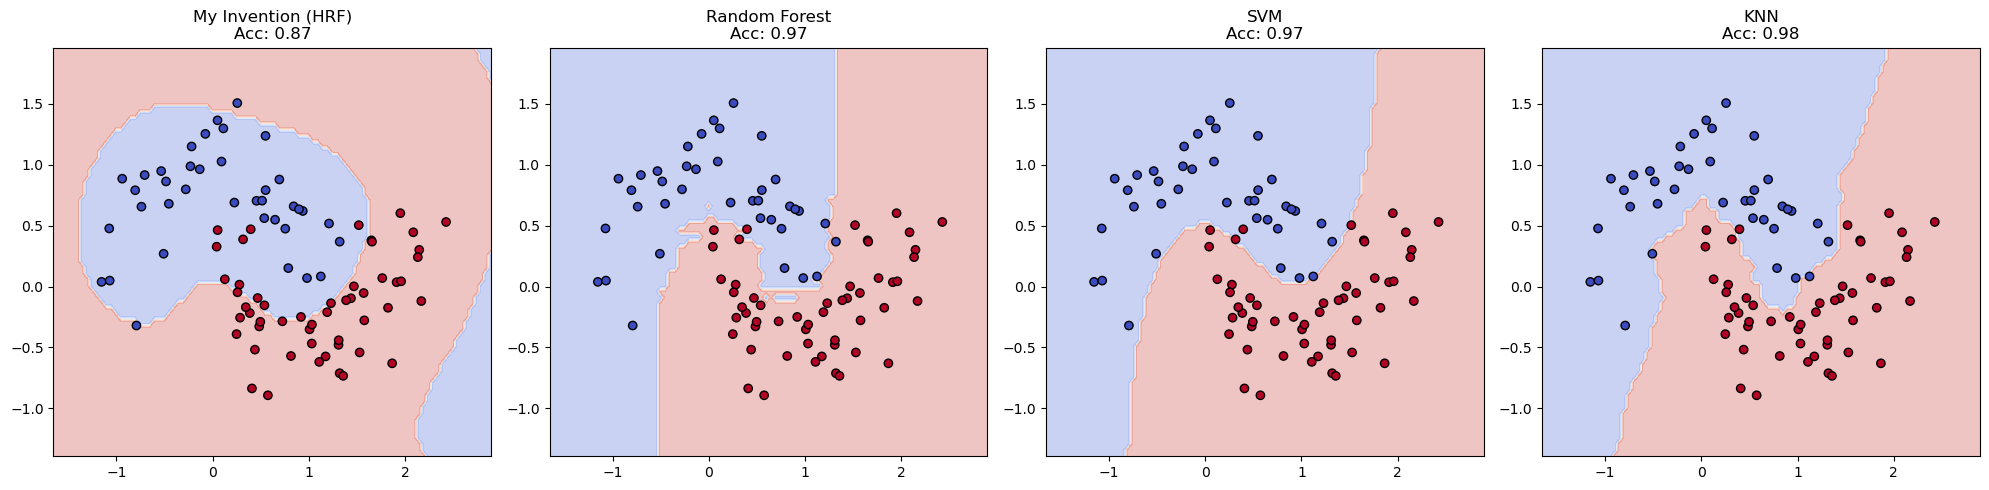


--- FINAL LEADERBOARD ---
KNN: 97.78%
Random Forest: 96.67%
SVM: 96.67%
My Invention (HRF): 86.67%


In [4]:
# Function to plot decision boundaries
def plot_boundary(model, X, y, ax, title):
    # Create a mesh grid
    h = .05
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot contours
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title(title)

# --- Run Predictions & Calculate Accuracy ---
models = [my_model, rf_model, svm_model, knn_model]
names = ["My Invention (HRF)", "Random Forest", "SVM", "KNN"]
scores = {}

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, model in enumerate(models):
    # Predict
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores[names[i]] = acc
    
    # Visualize
    plot_boundary(model, X_test, y_test, axes[i], f"{names[i]}\nAcc: {acc:.2f}")

plt.tight_layout()
plt.show()

# Print Final Leaderboard
print("\n--- FINAL LEADERBOARD ---")
for name, score in sorted(scores.items(), key=lambda x: x[1], reverse=True):
    print(f"{name}: {score*100:.2f}%")